# **TP - Grupo 4**
Pedro Paulo Costa Pereira - A88062

Tiago André Oliveira Leite - A91693

# **Problema  - Circuito**

In [5]:
import networkx as nx
from ortools.linear_solver import pywraplp
import random

In [82]:
def circuit_generator(I,Alpha):
    
    num_xors = 1#random.randint(0,I)
    num_nots = 1#random.randint(0,I)
    num_ands = int ((2*num_xors + 2*num_nots + I +1 )*Alpha // (1 - 2*Alpha))
    num_middle = num_xors + num_nots + num_ands -1
    total = I + num_xors + num_nots + num_ands + num_middle
    
    inputs = [i for i in range(I)]
    middle = [(I+i) for i in range(num_middle)]
    xors = [(I+num_middle+i) for i in range(num_xors)]
    nots = [(I+num_middle+num_xors+i) for i in range(num_nots)]
    ands = [(I+num_middle + num_xors+ num_nots + i) for i in range(num_ands)]
    
    G = nx.DiGraph()
    G.add_nodes_from(inputs,color=1)
    G.add_nodes_from(middle,color=1)
    G.add_nodes_from(xors, gate="XOR",color=3)
    G.add_nodes_from(nots, gate="NOT",color=3)
    G.add_nodes_from(ands, gates="AND", color=3)
    G.add_node(total,color=6)
    
    gates = xors + nots + ands 
    wires = [total] + middle
    for i in range(len(gates)):
        G.add_edge(wires[i],gates[i])
    
    for i in inputs:
        possibilities = xors + ands + [n for n in nots if G.out_degree(n)==0]
        conections = random.randint(1,len(possibilities)//2)
        random.shuffle(possibilities)
        for c in range(conections):
            G.add_edge(possibilities[c],i)
    
    
    for i in middle:
        possibilities = xors + ands + [n for n in nots if G.out_degree(n)==0]
        possibilities = [p for p in possibilities if (not nx.has_path(G,p,i) and not nx.has_path(G,p,i))]
        random.shuffle(possibilities)
        conections = random.randint(1,len(possibilities))
        for c in range(conections):
            G.add_edge(possibilities[c],i)
    
    
    nx.draw(G, with_labels = True,node_size=1000, pos=nx.planar_layout(G), node_color=[G.nodes[n]['color'] for n in G])
    
    
    return G
    
    
    

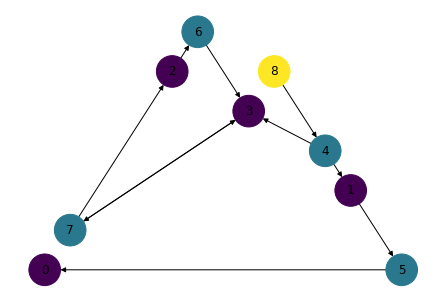

In [86]:
G = circuit_generator(1,0.2)